# Model

In [3]:
# Importing the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
# Load dataset
data = pd.read_csv('scraped_articles.csv')

In [5]:
# Handle missing values in the subtitle column
data['subtitle'] = data['subtitle'].fillna('')

In [6]:
# Preprocess data
data['subtitle'] = data['subtitle'].apply(lambda x: x.lower())

In [7]:
# Feature engineering
data['title_length'] = data['title'].apply(len)
data['subtitle_length'] = data['subtitle'].apply(len)
data['num_images'] = data['image_count']  
data['num_tags'] = data['tags'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0) 

In [8]:
# Vectorize text data (subtitle)
vectorizer = TfidfVectorizer(max_features=1000)
X_text = vectorizer.fit_transform(data['subtitle'])

In [9]:
# Combine text features with other features
X = pd.concat([pd.DataFrame(X_text.toarray()), data[['title_length', 'subtitle_length', 'num_images', 'num_tags']]], axis=1)

In [10]:
# Ensure all column names are strings
X.columns = X.columns.astype(str)

In [11]:
# Target variable
y = data['success']

In [12]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# Evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9148936170212766
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.20      0.33        10
           1       0.91      1.00      0.95        84

    accuracy                           0.91        94
   macro avg       0.96      0.60      0.64        94
weighted avg       0.92      0.91      0.89        94



In [15]:
# Used Logistic Regression as an alternate model
from sklearn.linear_model import LogisticRegression

# Train logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Evaluate logistic regression model
y_pred_logistic = logistic_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logistic))

Logistic Regression Accuracy: 0.8936170212765957
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.89      1.00      0.94        84

    accuracy                           0.89        94
   macro avg       0.45      0.50      0.47        94
weighted avg       0.80      0.89      0.84        94



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

# ROC Curve
def plot_roc_curve(y_true, y_pred, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

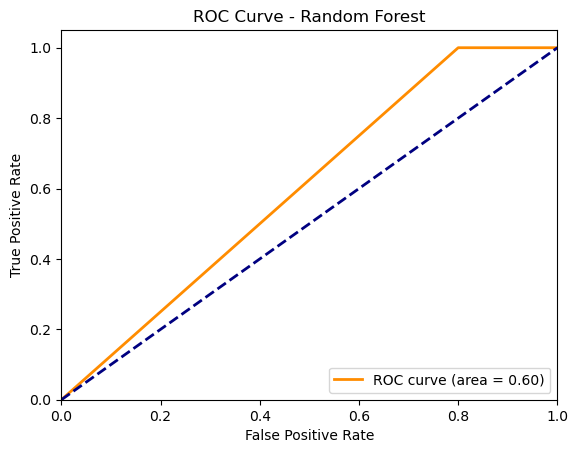

In [17]:
# Plot ROC curve for Random Forest
plot_roc_curve(y_test, y_pred, 'ROC Curve - Random Forest')



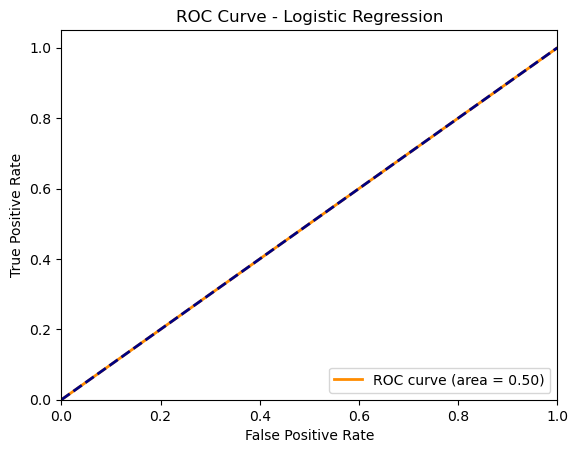

In [18]:
# Plot ROC curve for Logistic Regression
plot_roc_curve(y_test, y_pred_logistic, 'ROC Curve - Logistic Regression')

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

# Calculate metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)
roc_auc_rf = roc_auc_score(y_test, y_pred)

# Calculate metrics for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_logistic)
precision_lr = precision_score(y_test, y_pred_logistic)
recall_lr = recall_score(y_test, y_pred_logistic)
f1_lr = f1_score(y_test, y_pred_logistic)
roc_auc_lr = roc_auc_score(y_test, y_pred_logistic)

# Print the metrics
print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")
print(f"ROC AUC Score: {roc_auc_rf}")

print("\nLogistic Regression Metrics:")
print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1 Score: {f1_lr}")
print(f"ROC AUC Score: {roc_auc_lr}")

# Determine the best model
if accuracy_rf > accuracy_lr:
    print("\nRandom Forest is the best model based on accuracy.")
else:
    print("\nLogistic Regression is the best model based on accuracy.")

Random Forest Metrics:
Accuracy: 0.9148936170212766
Precision: 0.9130434782608695
Recall: 1.0
F1 Score: 0.9545454545454546
ROC AUC Score: 0.6

Logistic Regression Metrics:
Accuracy: 0.8936170212765957
Precision: 0.8936170212765957
Recall: 1.0
F1 Score: 0.9438202247191011
ROC AUC Score: 0.5

Random Forest is the best model based on accuracy.
